In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def generate_dataset1():
    x = np.array([np.random.rand() for i in range(1000)])
    y = np.array([x[i] + 0.05*np.random.rand() for i in range(1000)])
    return [x, y]

def generate_dataset2():
    x = [np.random.rand() for i in range(1000)]
    y = [(0.5 - x[i])*(0.7 - x[i]) + 1 for i in range(1000)]
    return [x, y]

# Example usage (for demonstration, maybe not needed in final code block)
# [x, y] = generate_dataset1()
# [x2, y2] = generate_dataset2()

In [36]:
print(np.shape(generate_dataset1()))

(2, 1000)


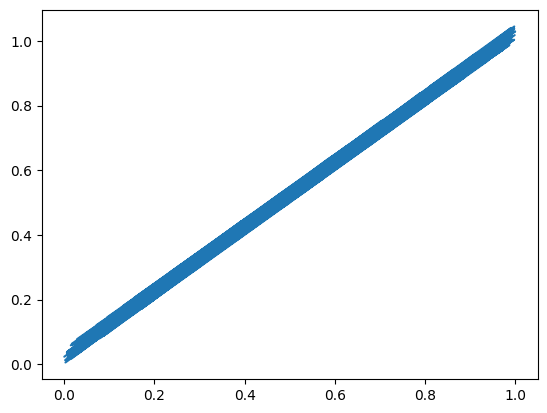

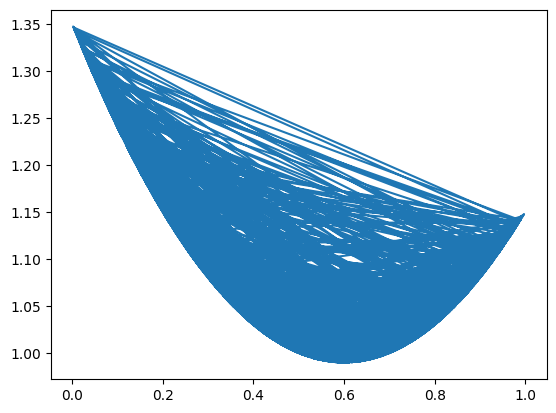

In [37]:
[x1,y1] = generate_dataset1()
[x2,y2] = generate_dataset2()

plt.figure()
plt.plot(x1,y1)
plt.show()

plt.figure()
plt.plot(x2,y2)
plt.show()

In [38]:
#I used straigt forward method to find the co variance and it took approx 5 min ot calculate for the mnist dataset. So I used numpy function to calculate it.

#I then calculated the covariance without a for loop and it really reducesd the time to approx 2sec.

def pca(data):
    #data is a mxn matrix, with each column represents each variable and each row representing data point.

    # cov_mat = np.zeros((data.shape[1],data.shape[1]))
    # for i in range(cov_mat.shape[0]):
    #     for j in range(cov_mat.shape[1]):
    #         tmp = data[:,i] - np.mean(data[:,i])
    #         tmp *= data[:,j] - np.mean(data[:,j])
    #         cov_mat[i,j] = np.mean(tmp)

    #cov_mat = np.cov(data.T) # For np.cov function, the matrix M has a variable in a row and single data point of all variables in a column.
    
    # NEW method to solve Covariance matrix, without using a for loop.
    column_mean = np.mean(data,axis=0)
    datasubmean = data - column_mean
    cov_mat = (datasubmean.T)@(datasubmean)
    cov_mat /= data.shape[0]

    eigval , eigvec = np.linalg.eig(cov_mat)

    # Below code is for sorting the eigen vectors.
    eigdict={}
    for i in range(len(eigval)):
        eigdict[eigval[i]] = eigvec[:,i]
    
    sorted_eigvals = sorted(eigval,reverse=True)
    sorted_eigvec = np.array([eigdict[i] for i in sorted_eigvals])

    #tmp is the the data in pca system
    tmp = data@(sorted_eigvec.T)
    return tmp
  

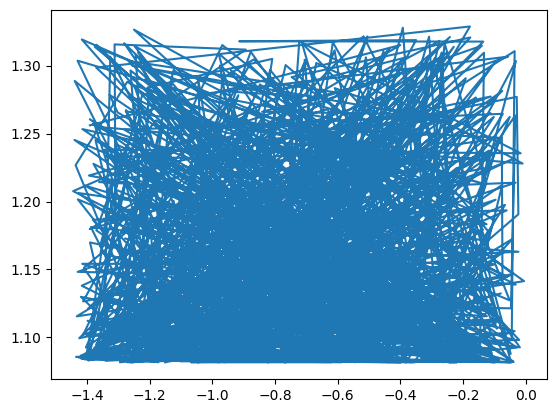

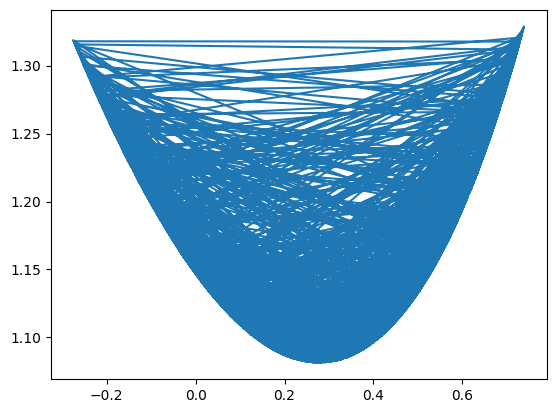

In [39]:
dt1 = np.array([x1,y1]).T
dt2 = np.array([x2,y2]).T

plt.figure()
plt.plot(pca(dt1)[:,0],pca(dt2)[:,1])
plt.show()

plt.figure()
plt.plot(pca(dt2)[:,0],pca(dt2)[:,1])
plt.show()

In [40]:
#for mnist dataset
from datasets import load_dataset

ds=load_dataset("ylecun/mnist")
data = ds['train']
x = np.array(data['image'])

print(x.shape)


(60000, 28, 28)


In [41]:
#converting 60000x28x28 data into 60000x(28*28)
dt2 = np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
print(dt2.shape)

pca_mnist = pca(dt2)
print(pca_mnist.shape)

(60000, 784)
(60000, 784)


In [42]:
dt2 = np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
print(dt2.shape)

from sklearn.decomposition import PCA # I used this to verify the time taken by efficient algorithm.
pca_mnist2 = PCA().fit_transform(dt2)

print(pca_mnist2.shape)

(60000, 784)
(60000, 784)
